# Predecir el coste del seguro médico de una persona (Solucion)

### Paso 1: Carga del conjunto de datos

In [12]:
import pandas as pd


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Exploracion y limpieza de datos

In [3]:
# Obtener dimensiones
total_data.shape

(1338, 7)

El DataFrame contiene 1338 registros (total de filas) y 7 variables (total de columnas).

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


De la información anterior, vemos que no tenemos algunos registros NaN.

En cuanto a tipos de datos, tenemos:

- 3 características categóricas (`id sex, smoker, region`)
- 4 características numéricas (`age, bmi, children, charges`)

#### Analisis de variables univariadas

##### Variables categoricas

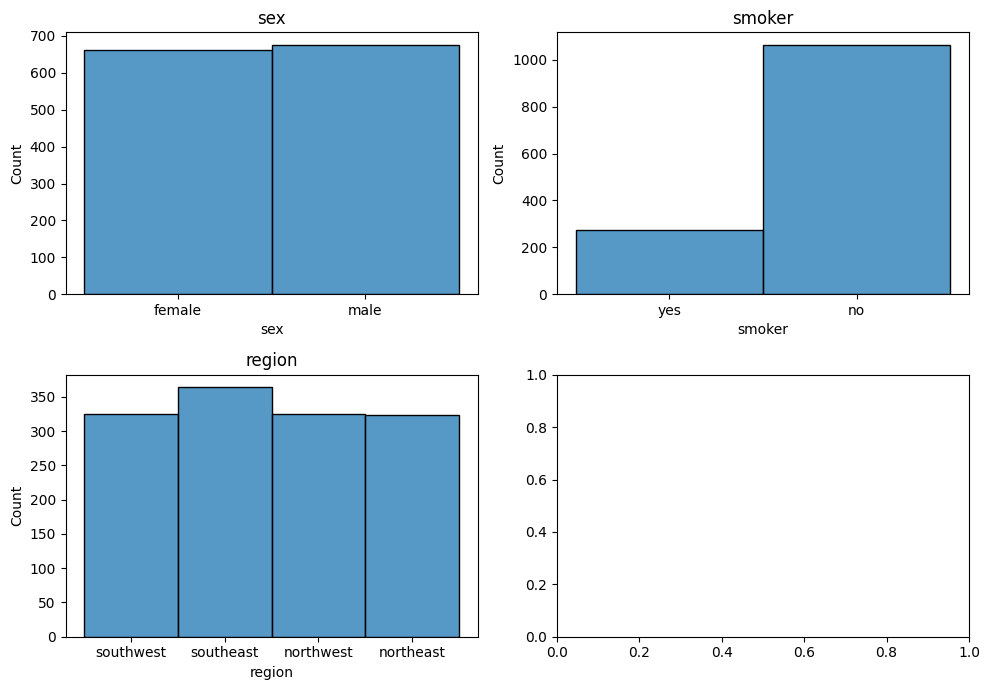

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical variables (assuming "id" is not categorical)
categorical_vars = ["sex", "smoker", "region"]

# Create a figure with appropriate subplots for clarity
fig, axes = plt.subplots(2, 2, figsize=(10, 7))  # 2 rows, 2 columns

# Create histograms for each categorical variable
for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    sns.histplot(ax=axes[row, col], data=total_data, x=var)
    axes[row, col].set_title(var)

# Adjust layout and remove unnecessary axes (optional)
plt.tight_layout()

# Show the plot
plt.show()

Del histograma podemos decir que:

* (`sex`) En relacion al genero del beneficiario principal, existe una representacion similar de personas del sexo masculino y femenino.

* (`smoker`) En relacion a las categorias de fumador se evidencia que predomina el no,

* (`region`) La distribucion por area residencial del beneficiario en USA de los beneficiarios son similares.

##### Variables numericas

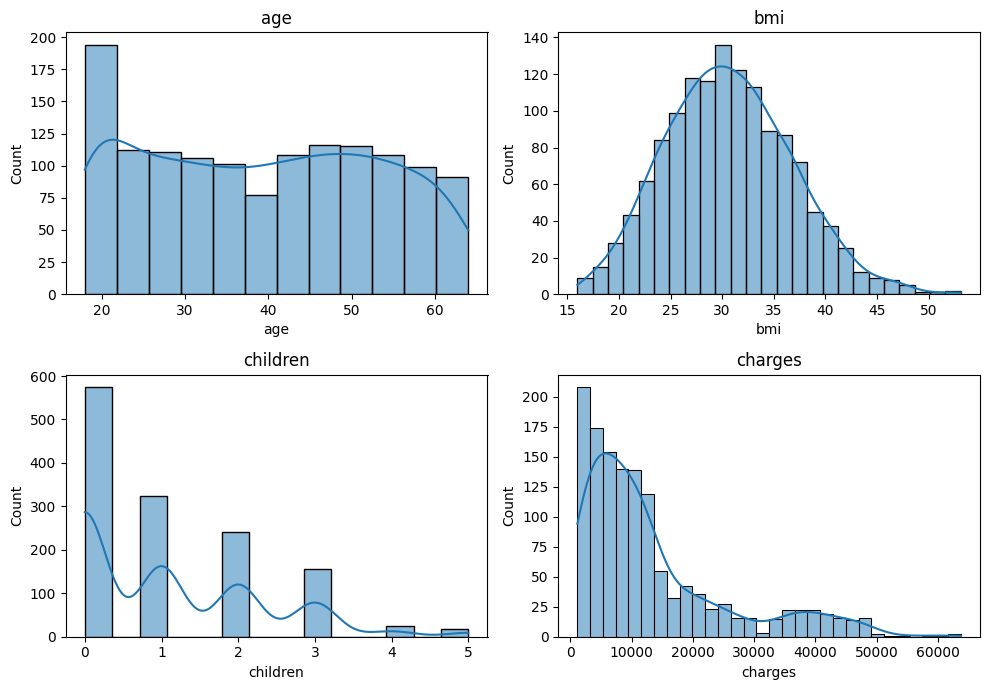

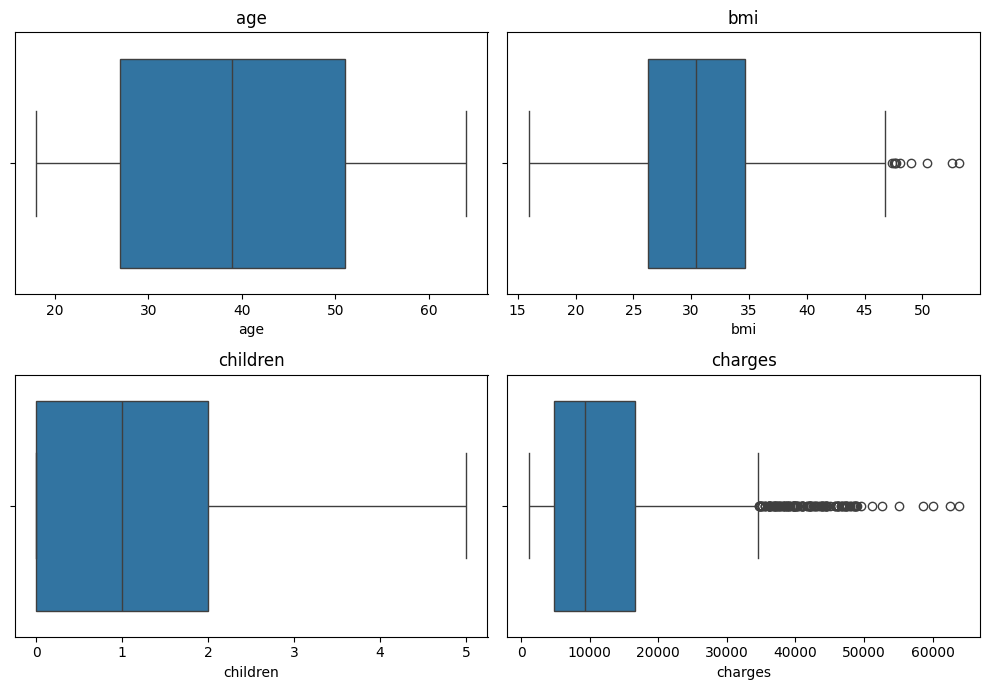

In [17]:
# Seleccionar las variables numéricas
numeric_vars = ["age", "bmi", "children", "charges"]

# Crear un subgráfico para cada variable numérica
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
for i, var in enumerate(numeric_vars):
    row = i // 2
    col = i % 2
    sns.histplot(data=total_data, x=var, ax=axes[row, col], kde=True)  # Agregamos KDE para suavizar la distribución
    axes[row, col].set_title(var)

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Crear box plots para una visión más detallada
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
for i, var in enumerate(numeric_vars):
    row = i // 2
    col = i % 2
    sns.boxplot(data=total_data, x=var, ax=axes[row, col])
    axes[row, col].set_title(var)

plt.tight_layout()
plt.show()

Del histograma y diagrama de caja podemos decir que:

* (`age`) Edad del beneficiario principal: la concentracion de las edades entre los 20 y 50 años.

* (`bmi`) indice de masa corporal:

* (`children`) Numero de niños/dependientes cubiertos por un seguro medico:

* (`charges`) Prima del seguro medico:


#### Analisis multivariante